In [ ]:
#Load and summarize the dataset
from pandas import read_csv
from pandas import set_option
from collections import Counter
#Define the dataset location
filename = 'sample_data/ecoli.csv'
#Load the csv file as a data frame
dataframe = read_csv(filename, header=None)
#Summarize the shape of the dataset
print(dataframe.shape)
#Describe the dataset
set_option('precision', 3)
print(dataframe.describe())
#Summarize the class distribution
target = dataframe.values[:,-1]
counter = Counter(target)
for k,v in counter.items():
	per = v / len(target) * 100
	print('Class=%s, Count=%d, Percentage=%.3f%%' % (k, v, per))

(336, 8)
             0        1        2        3        4        5        6
count  336.000  336.000  336.000  336.000  336.000  336.000  336.000
mean     0.500    0.500    0.495    0.501    0.500    0.500    0.500
std      0.195    0.148    0.088    0.027    0.122    0.216    0.209
min      0.000    0.160    0.480    0.500    0.000    0.030    0.000
25%      0.340    0.400    0.480    0.500    0.420    0.330    0.350
50%      0.500    0.470    0.480    0.500    0.495    0.455    0.430
75%      0.662    0.570    0.480    0.500    0.570    0.710    0.710
max      0.890    1.000    1.000    1.000    0.880    1.000    0.990
Class=cp, Count=143, Percentage=42.560%
Class=im, Count=77, Percentage=22.917%
Class=imS, Count=2, Percentage=0.595%
Class=imL, Count=2, Percentage=0.595%
Class=imU, Count=35, Percentage=10.417%
Class=om, Count=20, Percentage=5.952%
Class=omL, Count=5, Percentage=1.488%
Class=pp, Count=52, Percentage=15.476%


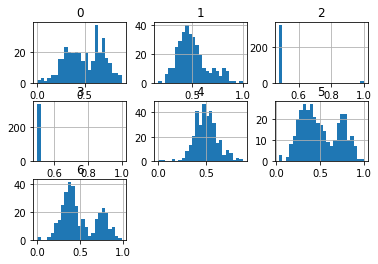

In [ ]:
#Creating histograms of all variables
from pandas import read_csv
from matplotlib import pyplot
#Define the dataset location
filename = 'sample_data/ecoli.csv'
#Load the csv file as a data frame
df = read_csv(filename, header=None)
#Create a histogram plot of each variable
df.hist(bins=25)
#Show the plot
pyplot.show()

In [ ]:
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
# import warnings
# warnings.filterwarnings("ignore")
 
#Load the dataset
def load_dataset(full_path):
	#Load the dataset as a numpy array
	data = read_csv(full_path, header=None)
	#Retrieve numpy array
	data = data.values
	#Split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	#Label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y
 
#Evaluate a model
def evaluate_model(X, y, model):
	#Define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	#Evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
#Define the location of the dataset
full_path = 'sample_data/ecoli.csv'
#Load the dataset
X, y = load_dataset(full_path)
#Summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
#Define the reference model
model = DummyClassifier(strategy='most_frequent')
#Evaluate the model
scores = evaluate_model(X, y, model)
#Summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(336, 7) (336,) Counter({0: 143, 1: 77, 7: 52, 4: 35, 5: 20, 6: 5, 3: 2, 2: 2})
Mean Accuracy: 0.426 (0.007)


In [ ]:
#Baseline model and test harness for the ecoli dataset
from collections import Counter
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.dummy import DummyClassifier
 
#Load the dataset
def load_dataset(full_path):
	#Load the dataset as a numpy array
	df = read_csv(full_path, header=None)
	#Remove rows for the minority classes
	df = df[df[7] != 'imS']
	df = df[df[7] != 'imL']
	#Retrieve numpy array
	data = df.values
	#Split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	#Label encode the target variable to have the classes 0 and 1
	y = LabelEncoder().fit_transform(y)
	return X, y
 
#Evaluate a model
def evaluate_model(X, y, model):
	#Define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	#Evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
#Define the location of the dataset
full_path = 'sample_data/ecoli.csv'
#Load the dataset
X, y = load_dataset(full_path)
#Summarize the loaded dataset
print(X.shape, y.shape, Counter(y))
#Define the reference model
model = DummyClassifier(strategy='most_frequent')
#Evaluate the model
scores = evaluate_model(X, y, model)
#Summarize performance
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

(332, 7) (332,) Counter({0: 143, 1: 77, 5: 52, 2: 35, 3: 20, 4: 5})
Mean Accuracy: 0.431 (0.006)


>Linear Discriminant Analysis 0.881 (0.041)
>Linear SVC 0.882 (0.040)
>Bagging Classifier 0.852 (0.036)
>Random Forest 0.886 (0.025)
>Extra Trees Classifier 0.878 (0.037)


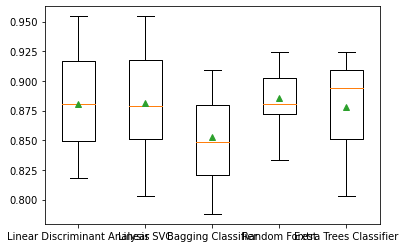

In [ ]:
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
 
#Load the dataset
def load_dataset(full_path):
	#Load the dataset as a numpy array
	df = read_csv(full_path, header=None)
	#Remove rows for the minority classes
	df = df[df[7] != 'imS']
	df = df[df[7] != 'imL']
	#Retrieve numpy array
	data = df.values
	#Split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	#Label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y
 
#Evaluate a model
def evaluate_model(X, y, model):
	#Define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	#Evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
#Define models to test
def get_models():
	models, names = list(), list()
	# LDA
	models.append(LinearDiscriminantAnalysis())
	names.append('Linear Discriminant Analysis')
	# SVM
	models.append(LinearSVC())
	names.append('Linear SVC')
	# Bagging
	models.append(BaggingClassifier(n_estimators=1000))
	names.append('Bagging Classifier')
	# RF
	models.append(RandomForestClassifier(n_estimators=1000))
	names.append('Random Forest')
	# ET
	models.append(ExtraTreesClassifier(n_estimators=1000))
	names.append('Extra Trees Classifier')
	return models, names
 
# Define the location of the dataset
full_path = 'sample_data/ecoli.csv'
# Load the dataset
X, y = load_dataset(full_path)
# Define models
models, names = get_models()
results = list()
# Evaluate each model
for i in range(len(models)):
	# Evaluate the model and store results
	scores = evaluate_model(X, y, models[i])
	results.append(scores)
	# Summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
# Plotting the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

>Logistic Regression 0.871 (0.035)
>Linear Discriminant Analysis 0.879 (0.041)
>Linear SVC 0.884 (0.039)
>KNN Classifier 0.836 (0.044)
>Gaussian Process Classifier 0.877 (0.038)


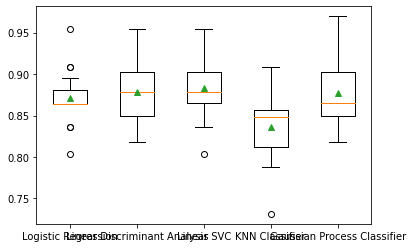

In [ ]:
#Spot check smote with machine learning algorithms on the ecoli dataset
from numpy import mean
from numpy import std
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
 
#Load the dataset
def load_dataset(full_path):
	#Load the dataset as a numpy array
	df = read_csv(full_path, header=None)
	#Remove rows for the minority classes
	df = df[df[7] != 'imS']
	df = df[df[7] != 'imL']
	#Retrieve numpy array
	data = df.values
	#Split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	#Label encode the target variable
	y = LabelEncoder().fit_transform(y)
	return X, y
 
#Evaluate a model
def evaluate_model(X, y, model):
	#Define evaluation procedure
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	#Evaluate model
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 
#Define models to test
def get_models():
	models, names = list(), list()
	# LR
	models.append(LogisticRegression(solver='lbfgs', multi_class='multinomial'))
	names.append('Logistic Regression')
	# LDA
	models.append(LinearDiscriminantAnalysis())
	names.append('Linear Discriminant Analysis')
	# SVM
	models.append(LinearSVC())
	names.append('Linear SVC')
	# KNN
	models.append(KNeighborsClassifier(n_neighbors=3))
	names.append('KNN Classifier')
	# GP
	models.append(GaussianProcessClassifier())
	names.append('Gaussian Process Classifier')
	return models, names
 
#Define the location of the dataset
full_path = 'sample_data/ecoli.csv'
#Load the dataset
X, y = load_dataset(full_path)
#Define models
models, names = get_models()
results = list()
#Evaluate each model
for i in range(len(models)):
	#Create pipeline
	steps = [('o', SMOTE(k_neighbors=2)), ('m', models[i])]
	pipeline = Pipeline(steps=steps)
	#Evaluate the model and store results
	scores = evaluate_model(X, y, pipeline)
	results.append(scores)
	#Summarize performance
	print('>%s %.3f (%.3f)' % (names[i], mean(scores), std(scores)))
#Plot the results
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [ ]:
#Fit a model and make predictions for the on the ecoli dataset
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
 
#Load the dataset
def load_dataset(full_path):
	#Load the dataset as a numpy array
	df = read_csv(full_path, header=None)
	#Remove rows for the minority classes
	df = df[df[7] != 'imS']
	df = df[df[7] != 'imL']
	#Retrieve numpy array
	data = df.values
	#Split into input and output elements
	X, y = data[:, :-1], data[:, -1]
	#Label encode the target variable
	le = LabelEncoder()
	y = le.fit_transform(y)
	return X, y, le
 
#Define the location of the dataset
full_path = 'sample_data/ecoli.csv'
#Load the dataset
X, y, le = load_dataset(full_path)
#Define model to evaluate
model = RandomForestClassifier(n_estimators=1000)
#Fit the model
model.fit(X, y)
#Known class "cp"
row = [0.49,0.29,0.48,0.50,0.56,0.24,0.35]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected cp)' % (label))
#Known class "im"
row = [0.06,0.61,0.48,0.50,0.49,0.92,0.37]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected im)' % (label))
#Known class "imU"
row = [0.72,0.42,0.48,0.50,0.65,0.77,0.79]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected imU)' % (label))
#Known class "om"
row = [0.78,0.68,0.48,0.50,0.83,0.40,0.29]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected om)' % (label))
#Known class "omL"
row = [0.77,0.57,1.00,0.50,0.37,0.54,0.0]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected omL)' % (label))
#Known class "pp"
row = [0.74,0.49,0.48,0.50,0.42,0.54,0.36]
yhat = model.predict([row])
label = le.inverse_transform(yhat)[0]
print('>Predicted=%s (expected pp)' % (label))

>Predicted=cp (expected cp)
>Predicted=im (expected im)
>Predicted=imU (expected imU)
>Predicted=om (expected om)
>Predicted=omL (expected omL)
>Predicted=pp (expected pp)
